# Fraud Data – Data Loading & Validation

## Objective
Load raw datasets and validate schema, data types, and basic integrity
before performing exploratory data analysis or feature engineering.

## Datasets
- Fraud_Data.csv
- IpAddress_to_Country.csv
- creditcard.csv


In [172]:
import pandas as pd
import numpy as np


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [173]:
fraud_df = pd.read_csv("../data/raw data/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw data/IpAddress_to_Country.csv")
credit_df = pd.read_csv("../data/raw data/creditcard.csv")


In [203]:
fraud_df.isna().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [204]:
credit_df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [174]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])


In [175]:
fraud_df["ip_address"] = fraud_df["ip_address"].astype("int64")
ip_df["lower_bound_ip_address"] = ip_df["lower_bound_ip_address"].astype("int64")
ip_df["upper_bound_ip_address"] = ip_df["upper_bound_ip_address"].astype("int64")


In [176]:
print("Fraud data shape:", fraud_df.shape)
print("IP data shape:", ip_df.shape)
print("Credit card data shape:", credit_df.shape)


Fraud data shape: (151112, 11)
IP data shape: (138846, 3)
Credit card data shape: (284807, 31)


In [177]:
fraud_df.info()
ip_df.info()
credit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column         

In [178]:
fraud_df.head()
ip_df.head()
credit_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [179]:
print("Fraud duplicates:", fraud_df.duplicated().sum())
print("IP duplicates:", ip_df.duplicated().sum())
print("Creditcard duplicates:", credit_df.duplicated().sum())


Fraud duplicates: 0
IP duplicates: 0
Creditcard duplicates: 1081


In [180]:
fraud_df["class"].value_counts(normalize=True)


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

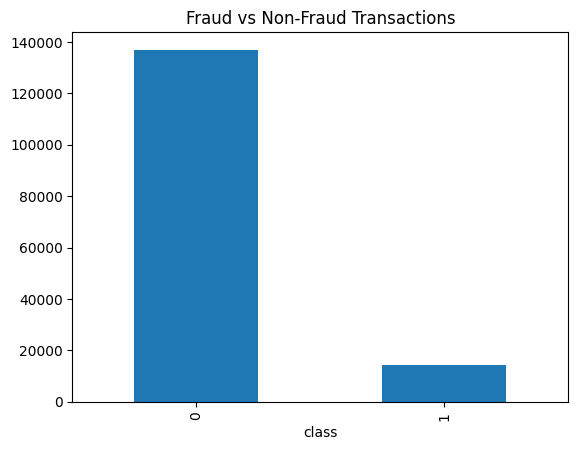

In [181]:
import matplotlib.pyplot as plt

fraud_df["class"].value_counts().plot(
    kind="bar",
    title="Fraud vs Non-Fraud Transactions"
)
plt.show()


In [182]:
fraud_df.groupby("class")["purchase_value"].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,136961.0,36.929418,18.315064,9.0,22.0,35.0,49.0,154.0
1,14151.0,36.993004,18.397654,9.0,22.0,35.0,49.0,111.0


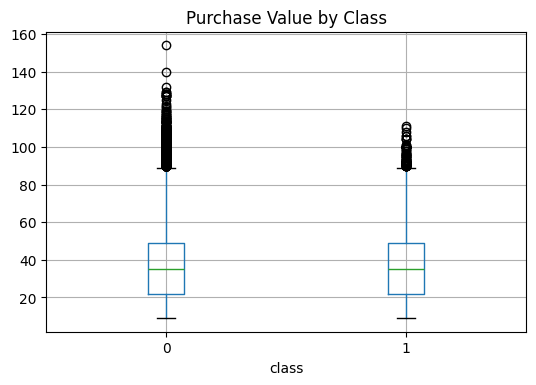

In [183]:
fraud_df.boxplot(
    column="purchase_value",
    by="class",
    figsize=(6,4)
)
plt.title("Purchase Value by Class")
plt.suptitle("")
plt.show()


In [184]:
fraud_df.groupby("class")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,136961.0,33.122356,8.622678,18.0,27.0,33.0,39.0,76.0
1,14151.0,33.318281,8.568001,18.0,27.0,33.0,39.0,68.0


In [185]:
pd.crosstab(fraud_df["source"], fraud_df["class"], normalize="index")
pd.crosstab(fraud_df["browser"], fraud_df["class"], normalize="index")
pd.crosstab(fraud_df["sex"], fraud_df["class"], normalize="index")


class,0,1
sex,,
F,0.908993,0.091007
M,0.904477,0.095523


In [186]:
ip_df = ip_df.sort_values("lower_bound_ip_address")


In [187]:
fraud_geo_df = pd.merge_asof(
    fraud_df.sort_values("ip_address"),
    ip_df,
    left_on="ip_address",
    right_on="lower_bound_ip_address",
    direction="backward"
)


In [188]:
invalid_ips = fraud_geo_df[
    fraud_geo_df["ip_address"] > fraud_geo_df["upper_bound_ip_address"]
]

print("Invalid IP mappings:", len(invalid_ips))


Invalid IP mappings: 21332


In [189]:
fraud_geo_df = fraud_geo_df[
    fraud_geo_df["ip_address"] <= fraud_geo_df["upper_bound_ip_address"]
]


In [190]:
country_fraud_rate = (
    fraud_geo_df
    .groupby("country")["class"]
    .mean()
    .sort_values(ascending=False)
)

country_fraud_rate.head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64

In [191]:
country_counts = fraud_geo_df["country"].value_counts().head(10)
country_counts


country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
Name: count, dtype: int64

In [192]:
fraud_geo_df["time_since_signup"] = (
    fraud_geo_df["purchase_time"] - fraud_geo_df["signup_time"]
).dt.total_seconds() / 3600  # hours


In [193]:
fraud_geo_df["hour_of_day"] = fraud_geo_df["purchase_time"].dt.hour
fraud_geo_df["day_of_week"] = fraud_geo_df["purchase_time"].dt.dayofweek


In [194]:
fraud_geo_df = fraud_geo_df.sort_values(["user_id", "purchase_time"])

fraud_geo_df["transaction_count"] = (
    fraud_geo_df
    .groupby("user_id")
    .cumcount() + 1
)


In [195]:
"transaction_count" in fraud_geo_df.columns


True

In [196]:
fraud_geo_df[
 ["time_since_signup", "hour_of_day", "day_of_week", "transaction_count"]
].describe()


,time_since_signup,hour_of_day,day_of_week,transaction_count
count,129146.000000,129146.000000,129146.000000,129146.0
mean,1368.680636,11.507333,3.013643,1.0
std,869.341295,6.910243,2.007088,0.0
min,0.000278,0.000000,0.000000,1.0
25%,605.618681,6.000000,1.000000,1.0
50%,1368.144861,12.000000,3.000000,1.0
75%,2123.208472,17.000000,5.000000,1.0
max,2879.992222,23.000000,6.000000,1.0


In [197]:
target = "class"

numerical_features = [
    "purchase_value",
    "age",
    "time_since_signup",
    "hour_of_day",
    "day_of_week",
    "transaction_count"
]

categorical_features = [
    "source",
    "browser",
    "sex",
    "country"
]


In [198]:
fraud_model_df = pd.get_dummies(
    fraud_geo_df,
    columns=categorical_features,
    drop_first=True
)


In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_model_df[numerical_features] = scaler.fit_transform(
    fraud_model_df[numerical_features]
)


In [200]:
fraud_model_df[target].value_counts(normalize=True)


class
0    0.905007
1    0.094993
Name: proportion, dtype: float64

In [201]:
# fallback resampling if imblearn not available: simple random upsampling
X = fraud_model_df.drop(columns=[target]).select_dtypes(include=[np.number, "bool"])
y = fraud_model_df[target].values

df_comb = X.copy()
df_comb[target] = y

counts = df_comb[target].value_counts()
max_n = counts.max()

resampled_parts = []
for cls, n in counts.items():
    cls_df = df_comb[df_comb[target] == cls]
    resampled_parts.append(cls_df.sample(max_n, replace=True, random_state=42))

df_resampled = pd.concat(resampled_parts).sample(frac=1, random_state=42).reset_index(drop=True)

X_resampled = df_resampled.drop(columns=[target])
y_resampled = df_resampled[target].values


In [202]:
pd.Series(y_resampled).value_counts()


0    116878
1    116878
Name: count, dtype: int64

## Exploratory Data Analysis – Credit Card Dataset


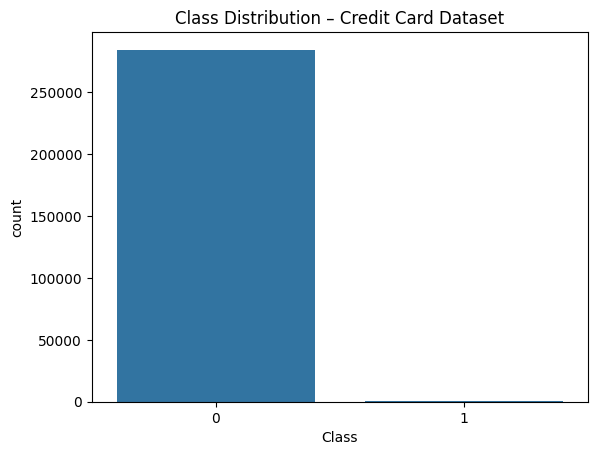

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Class", data=credit_df)
plt.title("Class Distribution – Credit Card Dataset")
plt.show()


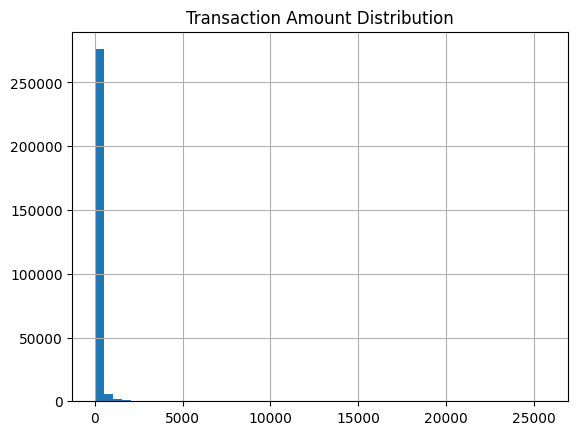

In [206]:
credit_df["Amount"].hist(bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


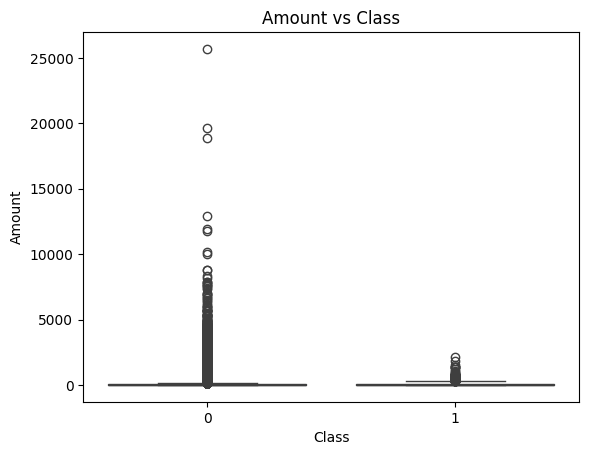

In [207]:
sns.boxplot(x="Class", y="Amount", data=credit_df)
plt.title("Amount vs Class")
plt.show()


“The dataset is highly imbalanced. Fraud transactions tend to have different amount distributions.”

In [208]:
from sklearn.model_selection import train_test_split

X = credit_df.drop(columns=["Class"])
y = credit_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [209]:
y_train.value_counts(normalize=True)


Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64